### General Geospatial Python visualization resources

[pyviz](https://pyviz.org/)

[visualizging geospatial data in Python](https://towardsdatascience.com/visualizing-geospatial-data-in-python-e070374fe621)

### Static Plotting with Geopandas and matplotlib
- We can load in some basic point spatial data of cities in Oregon to demonstrate plotting in `geopandas`
- `GeoPandas` provides a high-level interface to the `matplotlib` library for mapping
- You can use the default `plot` method on a `geopandas` `geoseries` or `geodataframe`

In [2]:
import geopandas as gpd
# File path
cities = gpd.read_file('https://github.com/mhweber/Rspatialworkshop/raw/master/inst/extdata/cities.shp')
# Check input data
cities.head()

,AREA,PERIMETER,CITIES_,CITIES_ID,CITY,FLAG,geometry
0,0.0,0.0,1,1658,MULINO,0,POINT (776899.812 1272019.125)
1,0.0,0.0,2,1368,HAMMOND,0,POINT (439320.844 1638725.000)
2,0.0,0.0,3,1366,FORT STEVENS,0,POINT (435108.000 1641590.750)
3,0.0,0.0,4,1382,GLIFTON,0,POINT (560721.000 1638699.875)
4,0.0,0.0,5,1384,BRADWOOD,0,POINT (568325.812 1632800.000)


<Axes: >

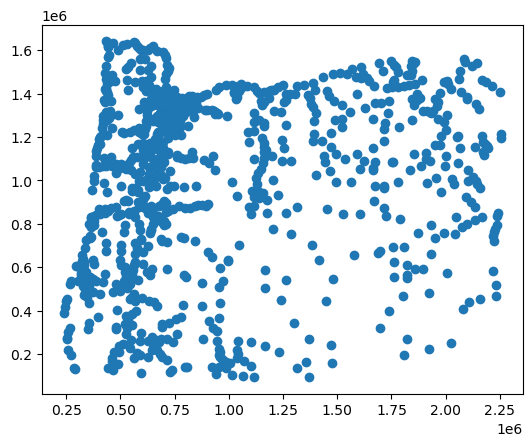

In [22]:
cities.plot()

What is odd about this plot? What do the axis labels denote?

In [3]:
cities.crs

<Projected CRS: PROJCS["Custom",GEOGCS["NAD83",DATUM["North_Americ ...>
Name: Custom
Axis Info [cartesian]:
- [east]: Easting (foot)
- [north]: Northing (foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

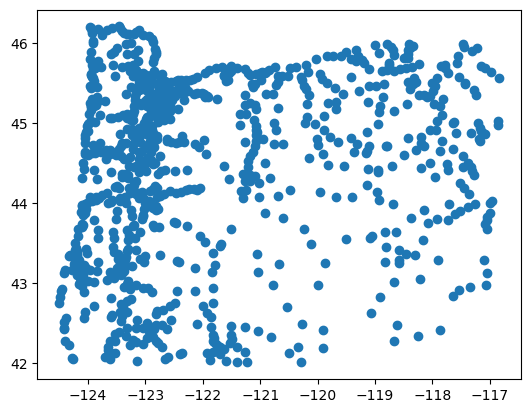

In [4]:
cities = cities.to_crs(4269)
cities.plot()

- We can switch to standard pandas plotting or back to 'geo' plotting as a method using the 'kind' keyword with plotting
- Here we'll scrape a web table of population to tie to our spatial cities `geopandas` dataframe to demonstrate

In [5]:
# !pip install lxml
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [8]:
page = requests.get("https://www.oregon-demographics.com/cities_by_population")
soup = BeautifulSoup(page.text, 'html.parser')

dfs = pd.read_html(page.text)

C:\Users\mweber\AppData\Local\Temp\ipykernel_223412\2867870904.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(page.text)


In [9]:
OregonCityPopulation = dfs[0]
OregonCityPopulation['City'] = OregonCityPopulation['City'].str.upper()
OregonCityPopulation.head()

,Rank,City,Population
0,1,PORTLAND,630498
1,2,EUGENE,177899
2,3,SALEM,177432
3,4,GRESHAM,110685
4,5,HILLSBORO,107730


- Join the population data to the spatial dataframe of Oregon cities
- Some cities in our `geodataframe` are not represented in the population data - thus the .notna() filter

In [11]:
cities = pd.merge(cities, OregonCityPopulation, left_on='CITY', right_on='City', how='left')
cities = cities[cities["Population"].notna()]
cities.head()

,AREA,PERIMETER,CITIES_,CITIES_ID,CITY,FLAG,geometry,Rank,City,Population
0,0.0,0.0,1,1658,MULINO,0,POINT (-122.57827 45.22108),154,MULINO,2203
6,0.0,0.0,7,1376,ASTORIA,1,POINT (-123.83443 46.17953),70,ASTORIA,9986
7,0.0,0.0,8,1370,WARRENTON,2,POINT (-123.92292 46.16368),95,WARRENTON,6255
8,0.0,0.0,9,1378,SVENSEN,0,POINT (-123.66137 46.16592),245,SVENSEN,812
12,0.0,0.0,13,1388,WESTPORT,0,POINT (-123.37178 46.13134),312,WESTPORT,367


- We can plot attributes using the 'geo' plot method, but standard matplotlib plotting methods might be what we're looking for

<Axes: >

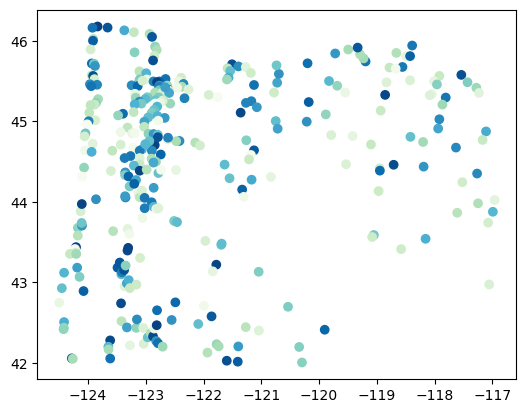

In [12]:
cities.plot(column="Population", cmap='GnBu')

<Axes: ylabel='Frequency'>

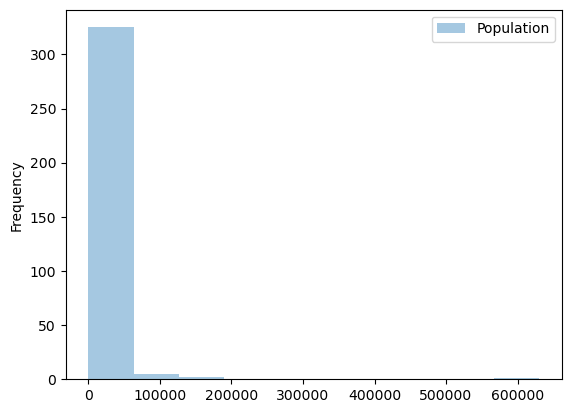

In [18]:
cities['Population'] = cities['Population'].astype(float)
cities[["Population", "geometry"]].plot.hist(alpha=.4)

### Layering features in static plots
- Bring in county background data using [pygris](https://walker-data.com/pygris/) to demonstrate state layered plot in `geopandas`

In [20]:
#!pip install pygris
from pygris import counties
import matplotlib.pyplot as plt

# Get the default TIGER/Line file for counties in Oregon
OR_counties = counties(state = "OR", cache = True)

Using the default year of 2021
Using FIPS code '41' for input 'OR'


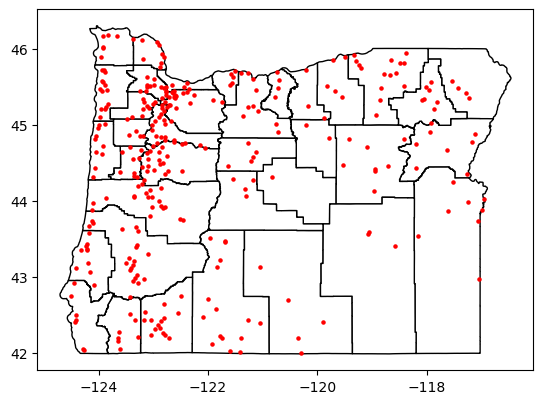

In [21]:
fig, ax = plt.subplots()

OR_counties.plot(ax=ax, color='white', edgecolor='black')


cities.plot(ax=ax, marker='o', color='red', markersize=5)


plt.show();

## Interactive Plotting
- `Geopandas` has built in basic interactive plotting capability
- The explore method is using `folium` under the hood

In [23]:
cities.explore()

### Folium
Folium example based on material [here](https://www.geeksforgeeks.org/visualizing-geospatial-data-using-folium-in-python/)

In [1]:
import folium

In [2]:
from pyproj import crs
import geopandas as gpd
import matplotlib.pyplot as plt

In [11]:
# Create a Map instance
m = folium.Map(location=[44.5, -123.2], zoom_start=10, control_scale=True)
m

In [16]:
# Convert points to GeoJSON
cities_gjson = folium.features.GeoJson(cities, name="Cities")

In [20]:
cities_gjson.data.get('features')[0:1]

[{'id': '0',
  'type': 'Feature',
  'properties': {'AREA': 0.0,
   'PERIMETER': 0.0,
   'CITIES_': 1,
   'CITIES_ID': 1658,
   'CITY': 'MULINO',
   'FLAG': 0},
  'geometry': {'type': 'Point',
   'coordinates': [-122.57826959386651, 45.221074913769144]},
  'bbox': [-122.57826959386651,
   45.221074913769144,
   -122.57826959386651,
   45.221074913769144]}]

In [17]:
# Create a Map instance
m = folium.Map(
    location=[44.5, -123.2], tiles="cartodbpositron", zoom_start=11, control_scale=True
)

# Add points to the map instance
cities_gjson.add_to(m)

# Alternative syntax for adding points to the map instance
# m.add_child(points_gjson)

# Show map
m